In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("aapl.us.txt", sep=",", parse_dates=["Date"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8364 entries, 0 to 8363
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     8364 non-null   datetime64[ns]
 1   Open     8364 non-null   float64       
 2   High     8364 non-null   float64       
 3   Low      8364 non-null   float64       
 4   Close    8364 non-null   float64       
 5   Volume   8364 non-null   int64         
 6   OpenInt  8364 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 457.5 KB


In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


In [5]:
df.shape

(8364, 7)

In [6]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,8364.000000,8364.000000,8364.000000,8364.000000,8.364000e+03,8364.0
mean,22.284350,22.495867,22.054244,22.281018,1.066416e+08,0.0
std,37.763402,38.057733,37.447432,37.764469,9.935187e+07,0.0
min,0.233050,0.235640,0.230510,0.230510,0.000000e+00,0.0
25%,1.137100,1.164200,1.112800,1.137100,4.384365e+07,0.0
50%,1.632800,1.663400,1.600600,1.628250,7.481383e+07,0.0
75%,23.739000,23.930500,23.335750,23.694500,1.320534e+08,0.0
max,175.110000,175.610000,174.270000,175.610000,2.069770e+09,0.0


In [7]:
df = df.drop(columns="OpenInt")

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062


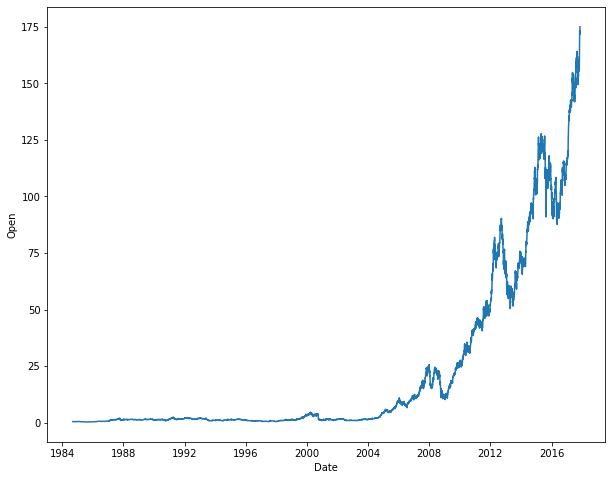

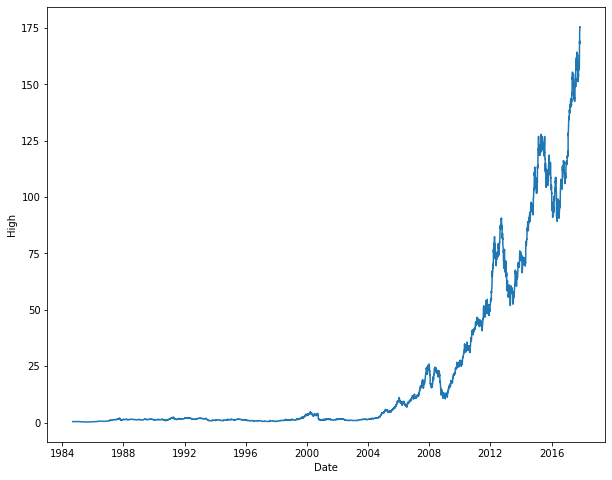

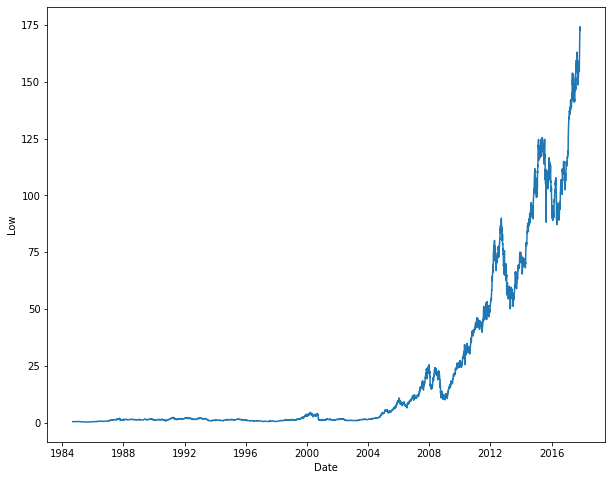

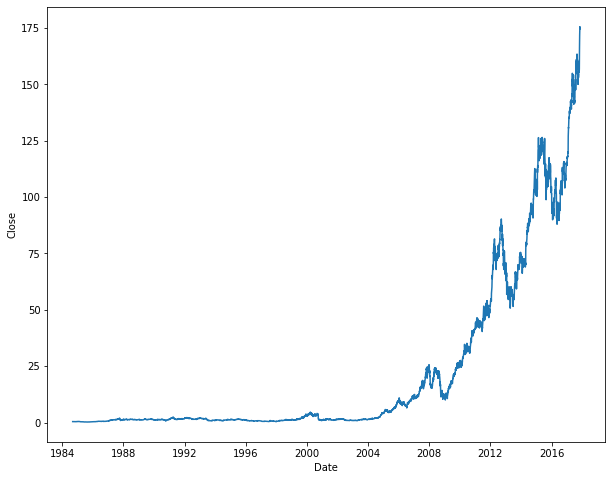

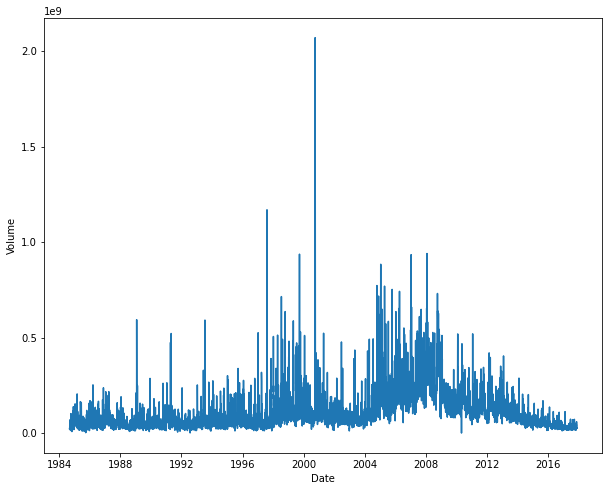

In [9]:
for col in df.columns[1:]:
    f, ax = plt.subplots(figsize=(10,8))
    sns.lineplot(data=df, x="Date", y=col)

In [10]:
df["Date"].max()

Timestamp('2017-11-10 00:00:00')

In [11]:
df["Date"].min()

Timestamp('1984-09-07 00:00:00')

In [12]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

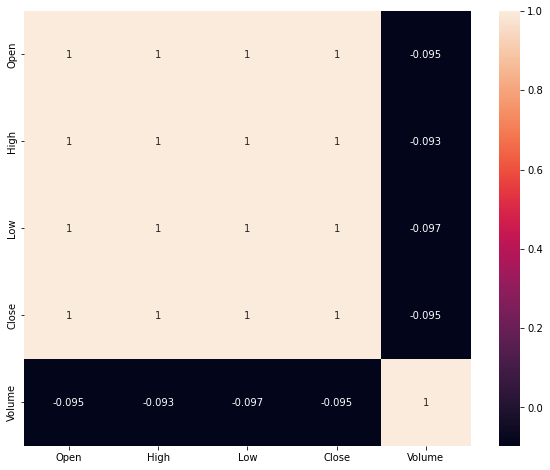

In [13]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10,8))
heatmap = sns.heatmap(corr, annot=True)

In [14]:
df = df.drop(columns="Volume")

In [15]:
df.head()

,Date,Open,High,Low,Close
0,1984-09-07,0.42388,0.42902,0.41874,0.42388
1,1984-09-10,0.42388,0.42516,0.41366,0.42134
2,1984-09-11,0.42516,0.43668,0.42516,0.42902
3,1984-09-12,0.42902,0.43157,0.41618,0.41618
4,1984-09-13,0.43927,0.44052,0.43927,0.43927


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

In [17]:
result_df = df.drop(columns="Date")

In [18]:
label = "Open"
features = result_df.drop(columns=label).columns

In [19]:
x, y = result_df[features], result_df[label]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [21]:
def show_metrics(predictions):
    print("R2: ", r2_score(y_test, predictions))
    print("MSE: ", mean_squared_error(y_test, predictions))
    print("MAE: ", mean_absolute_error(y_test, predictions))

In [22]:
gb_model = GradientBoostingRegressor().fit(x_train, y_train)

In [23]:
gb_predictions = gb_model.predict(x_test)

In [24]:
show_metrics(gb_predictions)

R2:  0.9998775042815735
MSE:  0.17448873424720487
MAE:  0.19297368345562263


In [25]:
rf_model = RandomForestRegressor().fit(x_train, y_train)

In [26]:
rf_predictions = rf_model.predict(x_test)

In [27]:
show_metrics(rf_predictions)

R2:  0.9999072188091059
MSE:  0.13216194630318248
MAE:  0.14032705702617246


In [28]:
n_model = KNeighborsRegressor().fit(x_train, y_train)

In [29]:
n_predictions = n_model.predict(x_test)

In [30]:
show_metrics(n_predictions)

R2:  0.9999188134661626
MSE:  0.11564596468480975
MAE:  0.14078385498007973


In [31]:
svr_model = SVR().fit(x_train, y_train)

In [32]:
svr_predictions = svr_model.predict(x_test)

In [33]:
show_metrics(svr_predictions)

R2:  0.9969625285649438
MSE:  4.326718948409408
MAE:  0.39217926320223495


In [34]:
knn_params = {"n_neighbors": [2,3,4,5,6], "weights": ["uniform", "distance"],
                "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
                "leaf_size": [20,25,30,35,45,50]}

In [35]:
transformer = ColumnTransformer(transformers=[("power_transf", PowerTransformer(), features)])

In [36]:
pipe = Pipeline(steps=[("transformer", transformer),
                       ("model", GridSearchCV(KNeighborsRegressor(), knn_params, cv=3, verbose=4))])

In [37]:
model = pipe.fit(x_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END algorithm=auto, leaf_size=20, n_neighbors=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 2/3] END algorithm=auto, leaf_size=20, n_neighbors=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 3/3] END algorithm=auto, leaf_size=20, n_neighbors=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 1/3] END algorithm=auto, leaf_size=20, n_neighbors=2, weights=distance;, score=1.000 total time=   0.0s
[CV 2/3] END algorithm=auto, leaf_size=20, n_neighbors=2, weights=distance;, score=1.000 total time=   0.0s
[CV 3/3] END algorithm=auto, leaf_size=20, n_neighbors=2, weights=distance;, score=1.000 total time=   0.0s
[CV 1/3] END algorithm=auto, leaf_size=20, n_neighbors=3, weights=uniform;, score=1.000 total time=   0.0s
[CV 2/3] END algorithm=auto, leaf_size=20, n_neighbors=3, weights=uniform;, score=1.000 total time=   0.0s
[CV 3/3] END algorithm=auto, leaf_size=20, n_neighbors=3, weights=uniform;, sc

In [38]:
predictions = model.predict(x_test)

In [39]:
show_metrics(predictions)

R2:  0.9999233608381346
MSE:  0.10916847151425384
MAE:  0.13529492977824012


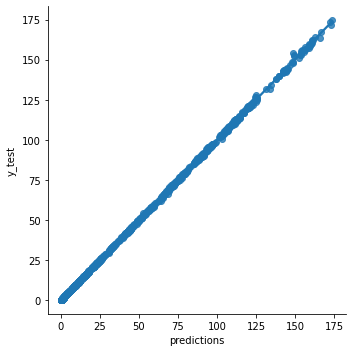

In [40]:
sns.lmplot(data=pd.DataFrame({"y_test": y_test, "predictions": predictions}), x="predictions", y="y_test")